# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | toungoo
City not found. Skipping...
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | morgan city
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | ajdabiya
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | makinsk
Processing Record 16 of Set 1 | clyde
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | spassk-ryazanskiy
Processing Record 19 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 20 of Set 1 | ribeira grande
Processing Record

Processing Record 39 of Set 4 | fare
Processing Record 40 of Set 4 | ormara
Processing Record 41 of Set 4 | kovvur
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | micheweni
Processing Record 0 of Set 5 | bathsheba
Processing Record 1 of Set 5 | hervey bay
Processing Record 2 of Set 5 | thinadhoo
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | ugoofaaru
Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | nanchang
Processing Record 9 of Set 5 | khandyga
Processing Record 10 of Set 5 | nicoya
Processing Record 11 of Set 5 | smithers
Processing Record 12 of Set 5 | warburton
Processing Re

Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | puerto narino
Processing Record 32 of Set 8 | iqaluit
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | phuthaditjhaba
Processing Record 37 of Set 8 | turukhansk
Processing Record 38 of Set 8 | aloleng
Processing Record 39 of Set 8 | bonfim
Processing Record 40 of Set 8 | yaan
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | japura
Processing Record 43 of Set 8 | mana
Processing Record 44 of Set 8 | waldshut-tiengen
Processing Record 45 of Set 8 | namibe
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | haapiti
Processing Record 48 of Set 8 | rock sound
Processing Record 49 of Set 8 | kijang
Processing Record 0 of Set 9 | manbij
Processing Record 1 of Set 9 | ijaki
City not found. Skipping...
Processing Record 2 of Set 9 | richards bay
Processing Record 3 of Set 9 | nago

Processing Record 17 of Set 12 | eskasem
City not found. Skipping...
Processing Record 18 of Set 12 | jalu
Processing Record 19 of Set 12 | faxinal
Processing Record 20 of Set 12 | marshall
Processing Record 21 of Set 12 | wanaka
Processing Record 22 of Set 12 | oussouye
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | bolshoye sorokino
City not found. Skipping...
Processing Record 25 of Set 12 | formosa do rio preto
Processing Record 26 of Set 12 | vilcun
Processing Record 27 of Set 12 | arawa
Processing Record 28 of Set 12 | vilyuysk
Processing Record 29 of Set 12 | anadyr
Processing Record 30 of Set 12 | genhe
Processing Record 31 of Set 12 | jinxi
Processing Record 32 of Set 12 | nabire
Processing Record 33 of Set 12 | uray
Processing Record 34 of Set 12 | puerto escondido
Processing Record 35 of Set 12 | green river
Processing Record 36 of Set 12 | tulum
Processing Record 37 of Set 12 | puerto lopez
Processing Record 38 of Set 12 | emba
Processing Record 39 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,300.75,73,68,7.39,MV,1675532198
1,punta arenas,-53.1500,-70.9167,283.21,87,100,4.12,CL,1675532115
2,dunedin,-45.8742,170.5036,293.04,84,91,3.13,NZ,1675532032
3,morgan city,29.6994,-91.2068,287.04,54,0,2.57,US,1675532236
4,chokurdakh,70.6333,147.9167,239.35,98,37,3.77,RU,1675532173


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.75,73,68,7.39,MV,1675532198
1,punta arenas,-53.1500,-70.9167,283.21,87,100,4.12,CL,1675532115
2,dunedin,-45.8742,170.5036,293.04,84,91,3.13,NZ,1675532032
3,morgan city,29.6994,-91.2068,287.04,54,0,2.57,US,1675532236
4,chokurdakh,70.6333,147.9167,239.35,98,37,3.77,RU,1675532173


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

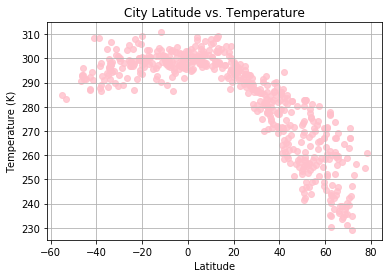

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="pink", alpha=.80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

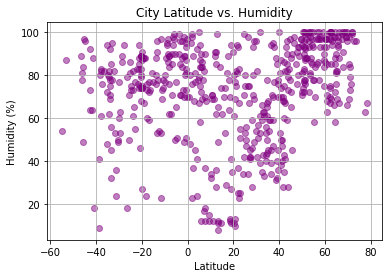

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="purple", alpha=.50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

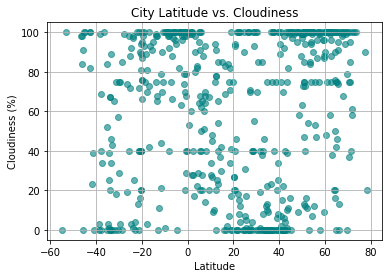

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="teal", alpha=.60)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

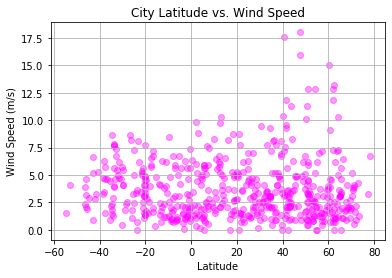

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="magenta", alpha=.40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,morgan city,29.6994,-91.2068,287.04,54,0,2.57,US,1675532236
4,chokurdakh,70.6333,147.9167,239.35,98,37,3.77,RU,1675532173
7,ajdabiya,30.7554,20.2263,286.49,57,85,2.53,LY,1675532240
9,albany,42.6001,-73.9662,261.30,41,40,0.89,US,1675532179
10,barrow,71.2906,-156.7887,243.16,76,40,4.12,US,1675532198


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.75,73,68,7.39,MV,1675532198
1,punta arenas,-53.1500,-70.9167,283.21,87,100,4.12,CL,1675532115
2,dunedin,-45.8742,170.5036,293.04,84,91,3.13,NZ,1675532032
5,atuona,-9.8000,-139.0333,298.97,77,1,8.48,PF,1675532116
6,saint-philippe,-21.3585,55.7679,299.92,88,72,5.35,RE,1675532186


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.778902949892973


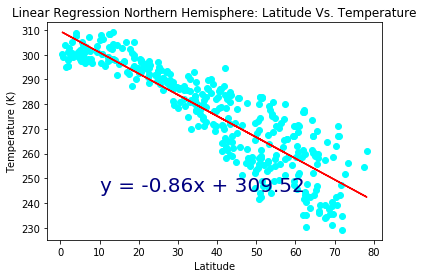

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,245), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Temperature")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.14296148439035739


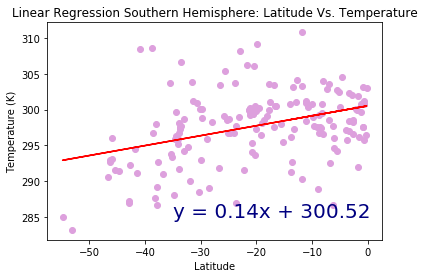

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-35,285), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Temperature")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong negative coorelation between max temperatures and the Northern Hemisphere while there is a moderate positive coorelation between max temperatures and the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21310013327610708


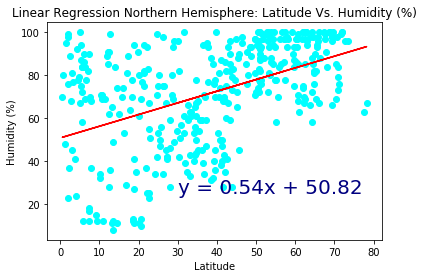

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.053911757401098236


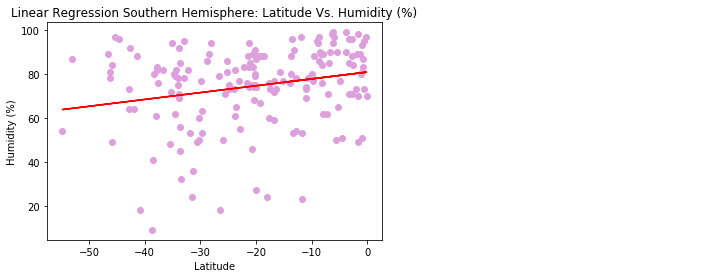

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a moderate positive coorelation between latitude and humidity while the Southern Hemisphere has weak positive coorelation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07115147554492415


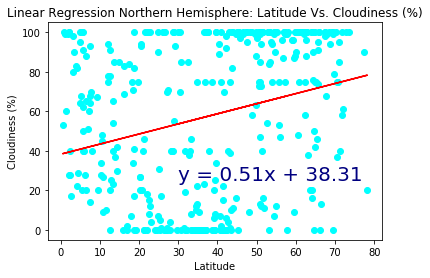

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Cloudiness (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.11726159395949709


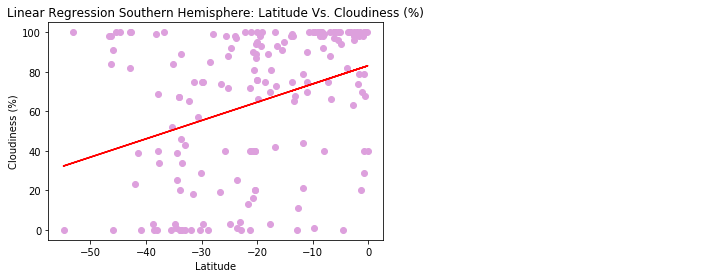

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Cloudiness (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak positive coorelation between cloudiness and latitude for both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.000976767969201573


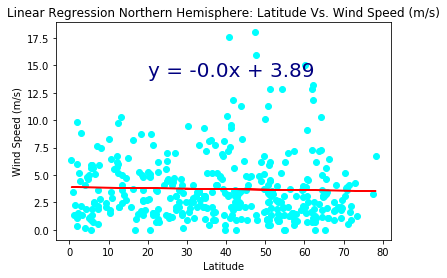

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,14), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.04306472765326695


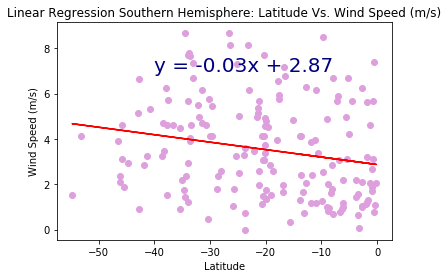

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,7), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak positive coorelation between wind speed and latitude in for the Northen Hemisphere while there is a weak negative coorelation between wind speed and latitude for the Southern Hemisphere.